<a href="https://colab.research.google.com/github/mnijhuis-dnb/OSBE_Traingsdagen_2022_Python/blob/main/Workshop_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
!git clone https://github.com/mnijhuis-dnb/OSBE_Traingsdagen_2022_Python.git

fatal: destination path 'OSBE_Traingsdagen_2022_Python' already exists and is not an empty directory.


# Python

### OSBE Trainingsdagen 2022

In [34]:
import pandas as pd 
import numpy as np

### Data inlezen 

Zelf een dataframe maken

In [35]:
raw_data_a = {
        'account_id': ['0', '1', '2', '3', '4'],
        'waarde': [5218, 268000, 30000, 415000, 235400],
        'aantal': [1, 1, 2, 2, 1]}
df_a = pd.DataFrame(raw_data_a, columns = ['account_id', 'waarde', 'aantal'])
df_a

,account_id,waarde,aantal
0,0,5218,1
1,1,268000,1
2,2,30000,2
3,3,415000,2
4,4,235400,1


Ingelezen data weergeven

In [36]:
df = pd.read_csv(r'/content/OSBE_Traingsdagen_2022_Python/Kernindicatoren.csv', delimiter=',', header='infer', index_col=None, skiprows=0, skip_blank_lines=True, on_bad_lines='warn')

Ingelezen data weergeven

In [37]:
df.head(5)

,Instrument,InstrumentSub,Sector,Periode,waarde
0,Consumptief krediet,Uitstaande bedragen (mln euro's),Huishoudens,2003-01,22284.0
1,Consumptief krediet,Uitstaande bedragen (mln euro's),Huishoudens,2003-02,22162.0
2,Consumptief krediet,Uitstaande bedragen (mln euro's),Huishoudens,2003-03,22877.0
3,Consumptief krediet,Uitstaande bedragen (mln euro's),Huishoudens,2003-04,22575.0
4,Consumptief krediet,Uitstaande bedragen (mln euro's),Huishoudens,2003-05,21868.0


kolom namen weergeven

In [38]:
df.columns

Index(['Instrument', 'InstrumentSub', 'Sector', 'Periode ', 'waarde'], dtype='object')

specifieke kolom selecteren

In [39]:
df['waarde'].tail(10)

4477    248575.0
4478    247220.0
4479    247366.0
4480    245848.0
4481    246720.0
4482    245423.0
4483    246083.0
4484    245986.0
4485    246942.0
4486    251824.0
Name: waarde, dtype: float64

In [40]:
col = df.columns
df[col[4]].tail(10)

4477    248575.0
4478    247220.0
4479    247366.0
4480    245848.0
4481    246720.0
4482    245423.0
4483    246083.0
4484    245986.0
4485    246942.0
4486    251824.0
Name: waarde, dtype: float64

Data types weergeven

In [41]:
df.dtypes

Instrument        object
InstrumentSub     object
Sector            object
Periode           object
waarde           float64
dtype: object

Data type wijzigen

Voor  wijzigen naar numerieke data gebruik pd.to_numeric(df[kolom], errors='coerce'), voor string gebruik df['kolom'].astype(str)

Voor format string zie: https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior

In [42]:
df['Periode '] = pd.to_datetime(df['Periode '],format='%Y-%m',errors='coerce')
df.head(5)

,Instrument,InstrumentSub,Sector,Periode,waarde
0,Consumptief krediet,Uitstaande bedragen (mln euro's),Huishoudens,2003-01-01,22284.0
1,Consumptief krediet,Uitstaande bedragen (mln euro's),Huishoudens,2003-02-01,22162.0
2,Consumptief krediet,Uitstaande bedragen (mln euro's),Huishoudens,2003-03-01,22877.0
3,Consumptief krediet,Uitstaande bedragen (mln euro's),Huishoudens,2003-04-01,22575.0
4,Consumptief krediet,Uitstaande bedragen (mln euro's),Huishoudens,2003-05-01,21868.0


In [43]:
df.dtypes

Instrument               object
InstrumentSub            object
Sector                   object
Periode          datetime64[ns]
waarde                  float64
dtype: object

Spaties verwijderen

In [44]:
df.columns = df.columns.str.strip()
df['Periode'].head(5)

0   2003-01-01
1   2003-02-01
2   2003-03-01
3   2003-04-01
4   2003-05-01
Name: Periode, dtype: datetime64[ns]

Data inlezen uit Excel

In [45]:
xls_file = pd.ExcelFile(r'/content/OSBE_Traingsdagen_2022_Python/Kernindicatoren.xlsx')
df = pd.read_excel(xls_file,sheet_name='Data', usecols='A, B, C, D, E') #sheet_name=None for all sheets
df.head(5)

,Instrument,InstrumentSub,Sector,Periode,waarde
0,Consumptief krediet,Uitstaande bedragen (mln euro's),Huishoudens,2003-01,22284
1,Consumptief krediet,Uitstaande bedragen (mln euro's),Huishoudens,2003-02,22162
2,Consumptief krediet,Uitstaande bedragen (mln euro's),Huishoudens,2003-03,22a77
3,Consumptief krediet,Uitstaande bedragen (mln euro's),Huishoudens,2003-04,22575
4,Consumptief krediet,Uitstaande bedragen (mln euro's),Huishoudens,2003-05,21868


### Data schonen 

Fouten uit data halen

Informatie over het dataframe ophalen

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4493 entries, 0 to 4492
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Instrument     4493 non-null   object
 1   InstrumentSub  4493 non-null   object
 2   Sector         4493 non-null   object
 3   Periode        4493 non-null   object
 4   waarde         4493 non-null   object
dtypes: object(5)
memory usage: 175.6+ KB


Cellen met ongeldige waardes identificeren

In [47]:
df['waarde'] = pd.to_numeric(df['waarde'], errors='coerce')
df.isna().sum()

Instrument       0
InstrumentSub    0
Sector           0
Periode          0
waarde           1
dtype: int64

Cellen met ongeldige waardes verwijderen, voor het vullen van nan's gebruik df.fillna(x), waarin x de waarde voor de nan is

In [48]:
df.dropna(how='any', thresh=2, axis=0, subset=['waarde','Instrument'], inplace=False).head(10)

,Instrument,InstrumentSub,Sector,Periode,waarde
0,Consumptief krediet,Uitstaande bedragen (mln euro's),Huishoudens,2003-01,22284.0
1,Consumptief krediet,Uitstaande bedragen (mln euro's),Huishoudens,2003-02,22162.0
3,Consumptief krediet,Uitstaande bedragen (mln euro's),Huishoudens,2003-04,22575.0
4,Consumptief krediet,Uitstaande bedragen (mln euro's),Huishoudens,2003-05,21868.0
5,Consumptief krediet,Uitstaande bedragen (mln euro's),Huishoudens,2003-06,22477.0
6,Consumptief krediet,Uitstaande bedragen (mln euro's),Huishoudens,2003-07,22798.0
7,Consumptief krediet,Uitstaande bedragen (mln euro's),Huishoudens,2003-08,22606.0
8,Consumptief krediet,Uitstaande bedragen (mln euro's),Huishoudens,2003-09,22656.0
9,Consumptief krediet,Uitstaande bedragen (mln euro's),Huishoudens,2003-10,22937.0
10,Consumptief krediet,Uitstaande bedragen (mln euro's),Huishoudens,2003-11,23037.0


NaN waardes interpoleren

In [49]:
df_interpolated = df.interpolate(method='linear', order=2, limit=5, limit_direction='both', limit_area='inside')
df_interpolated

,Instrument,InstrumentSub,Sector,Periode,waarde
0,Consumptief krediet,Uitstaande bedragen (mln euro's),Huishoudens,2003-01,22284.0
1,Consumptief krediet,Uitstaande bedragen (mln euro's),Huishoudens,2003-02,22162.0
2,Consumptief krediet,Uitstaande bedragen (mln euro's),Huishoudens,2003-03,22368.5
3,Consumptief krediet,Uitstaande bedragen (mln euro's),Huishoudens,2003-04,22575.0
4,Consumptief krediet,Uitstaande bedragen (mln euro's),Huishoudens,2003-05,21868.0
...,...,...,...,...,...
4488,Zakelijke kredietverlening,Uitstaande bedragen (mln euro's),Niet-financiële bedrijven,2021-08,245423.0
4489,Zakelijke kredietverlening,Uitstaande bedragen (mln euro's),Niet-financiële bedrijven,2021-09,246083.0
4490,Zakelijke kredietverlening,Uitstaande bedragen (mln euro's),Niet-financiële bedrijven,2021-10,245986.0
4491,Zakelijke kredietverlening,Uitstaande bedragen (mln euro's),Niet-financiële bedrijven,2021-11,246942.0


In [50]:
df.loc[df['waarde'].isna(), 'waarde'] = df_interpolated['waarde'].loc[df['waarde'].isna()]

Identieke rijen verwijderen

In [51]:
print("Aantal rijen voor verwijderen {}".format(len(df)))
df.drop_duplicates(inplace=True)
print("Aantal rijen na verwijderen {}".format(len(df)))

Aantal rijen voor verwijderen 4493
Aantal rijen na verwijderen 4487


Kolom toevoegen

In [52]:
df['waarde - 10'] = df['waarde'] - 10 
df.head(5)

,Instrument,InstrumentSub,Sector,Periode,waarde,waarde - 10
0,Consumptief krediet,Uitstaande bedragen (mln euro's),Huishoudens,2003-01,22284.0,22274.0
1,Consumptief krediet,Uitstaande bedragen (mln euro's),Huishoudens,2003-02,22162.0,22152.0
2,Consumptief krediet,Uitstaande bedragen (mln euro's),Huishoudens,2003-03,22368.5,22358.5
3,Consumptief krediet,Uitstaande bedragen (mln euro's),Huishoudens,2003-04,22575.0,22565.0
4,Consumptief krediet,Uitstaande bedragen (mln euro's),Huishoudens,2003-05,21868.0,21858.0


Kolommen of rijen laten vallen

In [53]:
df.drop(columns=['waarde - 10'], inplace=True)
df.head(5)

,Instrument,InstrumentSub,Sector,Periode,waarde
0,Consumptief krediet,Uitstaande bedragen (mln euro's),Huishoudens,2003-01,22284.0
1,Consumptief krediet,Uitstaande bedragen (mln euro's),Huishoudens,2003-02,22162.0
2,Consumptief krediet,Uitstaande bedragen (mln euro's),Huishoudens,2003-03,22368.5
3,Consumptief krediet,Uitstaande bedragen (mln euro's),Huishoudens,2003-04,22575.0
4,Consumptief krediet,Uitstaande bedragen (mln euro's),Huishoudens,2003-05,21868.0


Data afronden

In [54]:
df.round({'waarde' : -2}).head(5)

,Instrument,InstrumentSub,Sector,Periode,waarde
0,Consumptief krediet,Uitstaande bedragen (mln euro's),Huishoudens,2003-01,22300.0
1,Consumptief krediet,Uitstaande bedragen (mln euro's),Huishoudens,2003-02,22200.0
2,Consumptief krediet,Uitstaande bedragen (mln euro's),Huishoudens,2003-03,22400.0
3,Consumptief krediet,Uitstaande bedragen (mln euro's),Huishoudens,2003-04,22600.0
4,Consumptief krediet,Uitstaande bedragen (mln euro's),Huishoudens,2003-05,21900.0


Data discreet maken

In [55]:
pd.cut(df['waarde'], bins=[0,1e1,1e2,1e3,1e4,1e5,1e6,1e7],precision =2, retbins=True,  duplicates='drop')[0].head(5)

0    (10000.0, 100000.0]
1    (10000.0, 100000.0]
2    (10000.0, 100000.0]
3    (10000.0, 100000.0]
4    (10000.0, 100000.0]
Name: waarde, dtype: category
Categories (7, interval[float64, right]): [(0.0, 10.0] < (10.0, 100.0] < (100.0, 1000.0] <
                                           (1000.0, 10000.0] < (10000.0, 100000.0] <
                                           (100000.0, 1000000.0] < (1000000.0, 10000000.0]]

### Data indexeren en combineren 

Data indexeren op basis van labels of een boolean index

In [56]:
df.loc[df['InstrumentSub'].isna()]

,Instrument,InstrumentSub,Sector,Periode,waarde


In [57]:
df.loc[df['Periode']=='2006-06']

,Instrument,InstrumentSub,Sector,Periode,waarde
41,Consumptief krediet,Uitstaande bedragen (mln euro's),Huishoudens,2006-06,28950.00
324,Rekening courante tegoeden en spaargeld,Deposito's met opzegtermijn (mln euro's),Huishoudens,2006-06,215027.00
606,Rekening courante tegoeden en spaargeld,Deposito's met vaste looptijd (mln euro's),Huishoudens,2006-06,20650.00
856,Rekening courante tegoeden en spaargeld,Girale deposito's (mln euro's),Huishoudens,2006-06,57674.00
1663,Woninghypotheken,"Nieuwe contracten, inclusief heronderhandeling...",Huishoudens *,2006-06,9368.00
1896,Woninghypotheken,"Rente op nieuwe contracten, inclusief heronder...",Huishoudens *,2006-06,4.40
2129,Woninghypotheken,Rente op uitstaande bedragen (percentages),Huishoudens,2006-06,4.70
3005,Woninghypotheken,Uitstaande bedragen (mln euro's),Huishoudens,2006-06,443980.00
3328,Zakelijke kredietverlening,Nieuwe contracten (mln euro's),Niet-financiële bedrijven,2006-06,9783.00
3846,Zakelijke kredietverlening,Rente op nieuwe contracten > € 1 mln (percenta...,Niet-financiële bedrijven,2006-06,3.66


Data selecteren aan de hand van een integer index

In [58]:
df.iloc[45:55,:3]

,Instrument,InstrumentSub,Sector
45,Consumptief krediet,Uitstaande bedragen (mln euro's),Huishoudens
46,Consumptief krediet,Uitstaande bedragen (mln euro's),Huishoudens
47,Consumptief krediet,Uitstaande bedragen (mln euro's),Huishoudens
48,Consumptief krediet,Uitstaande bedragen (mln euro's),Huishoudens
49,Consumptief krediet,Uitstaande bedragen (mln euro's),Huishoudens
56,Consumptief krediet,Uitstaande bedragen (mln euro's),Huishoudens
57,Consumptief krediet,Uitstaande bedragen (mln euro's),Huishoudens
58,Consumptief krediet,Uitstaande bedragen (mln euro's),Huishoudens
59,Consumptief krediet,Uitstaande bedragen (mln euro's),Huishoudens
60,Consumptief krediet,Uitstaande bedragen (mln euro's),Huishoudens


Een enkel element selecteren

In [59]:
df.at[48,'waarde']

30625.0

Chain indexing, een subset van een subset van de data bekijken (niet gebruiken voor het toewijzen van data in een dataframe!)

In [60]:
df.loc[df['Periode']=='2006-06'].loc[:,'waarde']

41       28950.00
324     215027.00
606      20650.00
856      57674.00
1663      9368.00
1896         4.40
2129         4.70
3005    443980.00
3328      9783.00
3846         3.66
4078         4.60
4306    208315.00
Name: waarde, dtype: float64

Meerdere filters combineren

In [61]:
df.loc[(df['Instrument'].str.contains('hypotheken', case=False, na=False)) 
       & (df['InstrumentSub'].str.contains('zuiver nieuwe leningen', case=False, na=False)) 
       & (df['InstrumentSub'].str.contains('rente', case=False, na=False)) 
       & ((df['waarde'] >= 3) | (df['waarde'] < 2))]

,Instrument,InstrumentSub,Sector,Periode,waarde
2321,Woninghypotheken,Rente op zuiver nieuwe leningen (d.w.z. exclus...,Huishoudens,2014-12,3.22
2322,Woninghypotheken,Rente op zuiver nieuwe leningen (d.w.z. exclus...,Huishoudens,2015-01,3.16
2323,Woninghypotheken,Rente op zuiver nieuwe leningen (d.w.z. exclus...,Huishoudens,2015-02,3.20
2324,Woninghypotheken,Rente op zuiver nieuwe leningen (d.w.z. exclus...,Huishoudens,2015-03,3.11
2325,Woninghypotheken,Rente op zuiver nieuwe leningen (d.w.z. exclus...,Huishoudens,2015-04,3.02
2380,Woninghypotheken,Rente op zuiver nieuwe leningen (d.w.z. exclus...,Huishoudens,2019-11,1.92
2381,Woninghypotheken,Rente op zuiver nieuwe leningen (d.w.z. exclus...,Huishoudens,2019-12,1.88
2382,Woninghypotheken,Rente op zuiver nieuwe leningen (d.w.z. exclus...,Huishoudens,2020-01,1.85
2383,Woninghypotheken,Rente op zuiver nieuwe leningen (d.w.z. exclus...,Huishoudens,2020-02,1.82
2384,Woninghypotheken,Rente op zuiver nieuwe leningen (d.w.z. exclus...,Huishoudens,2020-03,1.77


De index opnieuw aanmaken

In [62]:
df2 = df.set_index(['Instrument','InstrumentSub','Sector','Periode'],append=False)
df2.head(20)

waarde
Instrument          InstrumentSub                    Sector      Periode         
Consumptief krediet Uitstaande bedragen (mln euro's) Huishoudens 2003-01  22284.0
                                                                 2003-02  22162.0
                                                                 2003-03  22368.5
                                                                 2003-04  22575.0
                                                                 2003-05  21868.0
                                                                 2003-06  22477.0
                                                                 2003-07  22798.0
                                                                 2003-08  22606.0
                                                                 2003-09  22656.0
                                                                 2003-10  22937.0
                                                                 2003-11  23037.0
                                                                 2003-12  23944.0
                                                                 2004-01  24073.0
                                                                 2004-02  24167.0
                                                                 2004-03  24760.0
                                                                 2004-04  25682.0
                                                                 2004-05  25269.0
                                                                 2004-06  25579.0
                                                                 2004-07  25703.0
                                                                 2004-08  26463.0

De index gebruiken voor het selecteren

In [63]:
df2.loc['Consumptief krediet',:,'Huishoudens','2006-06' ]

,,,,waarde
Instrument,InstrumentSub,Sector,Periode,
Consumptief krediet,Uitstaande bedragen (mln euro's),Huishoudens,2006-06,28950.0


Index maken en aanvullen

In [64]:
df['Periode'] = pd.to_datetime(df['Periode'],format='%Y-%m',errors='coerce')
df2 = df.set_index('Periode').head(20).reindex(pd.date_range('1/1/2002', periods=240, freq='MS'))
print(df2.loc['2002-05-01'])
print('')
print(df2.loc['2003-05-01'])

Instrument       NaN
InstrumentSub    NaN
Sector           NaN
waarde           NaN
Name: 2002-05-01 00:00:00, dtype: object

Instrument                    Consumptief krediet
InstrumentSub    Uitstaande bedragen (mln euro's)
Sector                                Huishoudens
waarde                                    21868.0
Name: 2003-05-01 00:00:00, dtype: object


Verschillende dataframes aan elkaar toevoegen 

In [65]:
df1 = df.tail(10)
df2 = df.head(10)
df1.append(df2, ignore_index=False, sort=False)

,Instrument,InstrumentSub,Sector,Periode,waarde
4483,Zakelijke kredietverlening,Uitstaande bedragen (mln euro's),Niet-financiële bedrijven,2021-03-01,248575.0
4484,Zakelijke kredietverlening,Uitstaande bedragen (mln euro's),Niet-financiële bedrijven,2021-04-01,247220.0
4485,Zakelijke kredietverlening,Uitstaande bedragen (mln euro's),Niet-financiële bedrijven,2021-05-01,247366.0
4486,Zakelijke kredietverlening,Uitstaande bedragen (mln euro's),Niet-financiële bedrijven,2021-06-01,245848.0
4487,Zakelijke kredietverlening,Uitstaande bedragen (mln euro's),Niet-financiële bedrijven,2021-07-01,246720.0
4488,Zakelijke kredietverlening,Uitstaande bedragen (mln euro's),Niet-financiële bedrijven,2021-08-01,245423.0
4489,Zakelijke kredietverlening,Uitstaande bedragen (mln euro's),Niet-financiële bedrijven,2021-09-01,246083.0
4490,Zakelijke kredietverlening,Uitstaande bedragen (mln euro's),Niet-financiële bedrijven,2021-10-01,245986.0
4491,Zakelijke kredietverlening,Uitstaande bedragen (mln euro's),Niet-financiële bedrijven,2021-11-01,246942.0
4492,Zakelijke kredietverlening,Uitstaande bedragen (mln euro's),Niet-financiële bedrijven,2021-12-01,251824.0


Databronnen die samengevoegd moeten worden

In [66]:
raw_data_a = {
        'account_id': ['0', '1', '2', '3', '4'],
        'datum': ['2009-12', '2010-01', '2009-12', '2010-01', '2010-01'],
        'type': ['Consumptief krediet', 'Woninghypotheken', 'Zakelijke kredietverlening', 'Woninghypotheken', 'Zakelijke kredietverlening'],
        'initieel bedrag': [5218, 268000, 30000, 415000, 235400]}
df_a = pd.DataFrame(raw_data_a, columns = ['account_id', 'datum', 'type', 'initieel bedrag'])
print(df_a)
print('')
raw_data_b = {
        'account_id': ['0', '0', '1', '3', '0', '2', '1', '3', '3', '2','5'],
        'datum': ['2009-12', '2010-01', '2010-01', '2010-01', '2010-01', '2010-01', '2010-02', '2010-02', '2010-02', '2010-02', '2010-02'],
        'afbetaling': [211, 516, 245, 189, 520, 110, 548, 328, 1065, 985, 1050],
        'type': ['standaard', 'standaard', 'standaard', 'standaard', 'extra', 'standaard', 'standaard', 'standaard', 'extra', 'standaard', 'standaard']}
df_b = pd.DataFrame(raw_data_b, columns = ['account_id', 'datum', 'afbetaling','type'])
print(df_b)

  account_id    datum                        type  initieel bedrag
0          0  2009-12         Consumptief krediet             5218
1          1  2010-01            Woninghypotheken           268000
2          2  2009-12  Zakelijke kredietverlening            30000
3          3  2010-01            Woninghypotheken           415000
4          4  2010-01  Zakelijke kredietverlening           235400

   account_id    datum  afbetaling       type
0           0  2009-12         211  standaard
1           0  2010-01         516  standaard
2           1  2010-01         245  standaard
3           3  2010-01         189  standaard
4           0  2010-01         520      extra
5           2  2010-01         110  standaard
6           1  2010-02         548  standaard
7           3  2010-02         328  standaard
8           3  2010-02        1065      extra
9           2  2010-02         985  standaard
10          5  2010-02        1050  standaard


Samenvoegen van tabellen via merge

In [67]:
pd.merge(df_a, df_b, how='outer', left_on=['account_id', 'datum'], right_on=['account_id', 'datum'],suffixes=('_a', '_b'),indicator=True)

,account_id,datum,type_a,initieel bedrag,afbetaling,type_b,_merge
0,0,2009-12,Consumptief krediet,5218.0,211.0,standaard,both
1,1,2010-01,Woninghypotheken,268000.0,245.0,standaard,both
2,2,2009-12,Zakelijke kredietverlening,30000.0,NaN,NaN,left_only
3,3,2010-01,Woninghypotheken,415000.0,189.0,standaard,both
4,4,2010-01,Zakelijke kredietverlening,235400.0,NaN,NaN,left_only
5,0,2010-01,NaN,NaN,516.0,standaard,right_only
6,0,2010-01,NaN,NaN,520.0,extra,right_only
7,2,2010-01,NaN,NaN,110.0,standaard,right_only
8,1,2010-02,NaN,NaN,548.0,standaard,right_only
9,3,2010-02,NaN,NaN,328.0,standaard,right_only


De data uit twee dataframes bij elkaar optellen

In [68]:
raw_data_a = {
        'account_id': ['0', '1', '2', '3', '4'],
        'waarde': [5218, 268000, 30000, 415000, 235400],
        'aantal': [1, 1, 2, 2, 1]}
df_a = pd.DataFrame(raw_data_a, columns = ['waarde', 'aantal'], index = raw_data_a['account_id'])
print(df_a)
print('')
raw_data_b = {
        'account_id': ['1', '0', '3', '2'],
        'waarde': [100, 200, 300, 400],
        'aantal': [1, 1, 1, 1]}
df_b = pd.DataFrame(raw_data_b, columns = ['waarde', 'aantal'], index = raw_data_b['account_id'])
print(df_b)
print(df_a+df_b)

   waarde  aantal
0    5218       1
1  268000       1
2   30000       2
3  415000       2
4  235400       1

   waarde  aantal
1     100       1
0     200       1
3     300       1
2     400       1
     waarde  aantal
0    5418.0     2.0
1  268100.0     2.0
2   30400.0     3.0
3  415300.0     3.0
4       NaN     NaN


### Data analyseren 

Data sorteren

In [69]:
df.sort_values(by=['Periode','Sector'], ascending=True, na_position='last').tail(15)

,Instrument,InstrumentSub,Sector,Periode,waarde
3518,Zakelijke kredietverlening,Nieuwe contracten (mln euro's),Niet-financiële bedrijven,2022-04-01,11514.00
3661,Zakelijke kredietverlening,Rente op nieuwe contracten <= € 0.25 mln (perc...,Niet-financiële bedrijven,2022-04-01,2.89
3804,Zakelijke kredietverlening,Rente op nieuwe contracten <= € 0.25 mln en <=...,Niet-financiële bedrijven,2022-04-01,2.52
4036,Zakelijke kredietverlening,Rente op nieuwe contracten > € 1 mln (percenta...,Niet-financiële bedrijven,2022-04-01,1.28
515,Rekening courante tegoeden en spaargeld,Deposito's met opzegtermijn (mln euro's),Huishoudens,2022-05-01,367058.00
797,Rekening courante tegoeden en spaargeld,Deposito's met vaste looptijd (mln euro's),Huishoudens,2022-05-01,60295.00
1047,Rekening courante tegoeden en spaargeld,Girale deposito's (mln euro's),Huishoudens,2022-05-01,131896.00
1334,Roodstand en doorlopend krediet,Rente op uitstaand bedrag - Rekeningcourant kr...,Huishoudens,2022-05-01,3.60
1621,Roodstand en doorlopend krediet,Uitstaand bedrag - Rekeningcourant krediet - R...,Huishoudens,2022-05-01,5221.00
2320,Woninghypotheken,Rente op uitstaande bedragen (percentages),Huishoudens,2022-05-01,2.25


De cijferdata uit een dataframe halen

In [70]:
numerieke_waardes = df['waarde'].values
print(numerieke_waardes)

[ 22284.   22162.   22368.5 ... 245986.  246942.  251824. ]


Basis statistieken voor de data weergeven (numerieke kolommen)

In [71]:
df.describe()

,waarde
count,4487.000000
mean,69613.623067
std,129966.053776
min,0.570000
25%,4.600000
50%,8759.000000
75%,56466.000000
max,546832.000000


of handmatig 

In [72]:
print(df.quantile(q=0.9))
print(df.max())

waarde    276261.6
Name: 0.9, dtype: float64
Instrument                              Zakelijke kredietverlening
InstrumentSub    Zuiver nieuwe leningen (d.w.z. exclusief heron...
Sector                                   Niet-financiële bedrijven
Periode                                        2022-05-01 00:00:00
waarde                                                    546832.0
dtype: object


Pivot tabel maken

In [73]:
pd.pivot_table(df, values=['waarde'], index=['Periode', 'InstrumentSub'], aggfunc={'waarde': [min, max, sum]}).tail(20)

waarde  \
                                                                     max   
Periode    InstrumentSub                                                   
2022-04-01 Rente op nieuwe contracten, inclusief heronderh...       1.88   
           Rente op uitstaand bedrag - Rekeningcourant kre...       6.86   
           Rente op uitstaand bedrag - Rekeningcourant kre...       3.70   
           Rente op uitstaande bedragen (percentages)               2.27   
           Rente op zuiver nieuwe leningen (d.w.z. exclusi...       1.80   
           Uitstaand bedrag - Rekeningcourant krediet - Do...     372.00   
           Uitstaand bedrag - Rekeningcourant krediet - Ro...    5481.00   
           Uitstaande bedragen (mln euro's)                    522141.00   
           Zuiver nieuwe leningen (d.w.z. exclusief herond...    7427.00   
2022-05-01 Deposito's met opzegtermijn (mln euro's)            367058.00   
           Deposito's met vaste looptijd (mln euro's)           60295.00   
           Girale deposito's (mln euro's)                      131896.00   
           Nieuwe contracten, inclusief heronderhandelinge...   11796.00   
           Rente op nieuwe contracten, inclusief heronderh...       2.03   
           Rente op uitstaand bedrag - Rekeningcourant kre...       3.60   
           Rente op uitstaande bedragen (percentages)               2.25   
           Rente op zuiver nieuwe leningen (d.w.z. exclusi...       1.97   
           Uitstaand bedrag - Rekeningcourant krediet - Ro...    5221.00   
           Uitstaande bedragen (mln euro's)                    536871.00   
           Zuiver nieuwe leningen (d.w.z. exclusief herond...    7324.00   

                                                                          \
                                                                     min   
Periode    InstrumentSub                                                   
2022-04-01 Rente op nieuwe contracten, inclusief heronderh...       1.88   
           Rente op uitstaand bedrag - Rekeningcourant kre...       6.86   
           Rente op uitstaand bedrag - Rekeningcourant kre...       3.70   
           Rente op uitstaande bedragen (percentages)               2.27   
           Rente op zuiver nieuwe leningen (d.w.z. exclusi...       1.80   
           Uitstaand bedrag - Rekeningcourant krediet - Do...     372.00   
           Uitstaand bedrag - Rekeningcourant krediet - Ro...    5481.00   
           Uitstaande bedragen (mln euro's)                    522141.00   
           Zuiver nieuwe leningen (d.w.z. exclusief herond...    7427.00   
2022-05-01 Deposito's met opzegtermijn (mln euro's)            367058.00   
           Deposito's met vaste looptijd (mln euro's)           60295.00   
           Girale deposito's (mln euro's)                      131896.00   
           Nieuwe contracten, inclusief heronderhandelinge...   11796.00   
           Rente op nieuwe contracten, inclusief heronderh...       2.03   
           Rente op uitstaand bedrag - Rekeningcourant kre...       3.60   
           Rente op uitstaande bedragen (percentages)               2.25   
           Rente op zuiver nieuwe leningen (d.w.z. exclusi...       1.97   
           Uitstaand bedrag - Rekeningcourant krediet - Ro...    5221.00   
           Uitstaande bedragen (mln euro's)                    536871.00   
           Zuiver nieuwe leningen (d.w.z. exclusief herond...    7324.00   

                                                                          
                                                                     sum  
Periode    InstrumentSub                                                  
2022-04-01 Rente op nieuwe contracten, inclusief heronderh...       1.88  
           Rente op uitstaand bedrag - Rekeningcourant kre...       6.86  
           Rente op uitstaand bedrag - Rekeningcourant kre...       3.70  
           Rente op uitstaande bedragen (percentages)               2.27  
           Rente op zuiver nieuwe leningen 

Maken van een lopend gemiddelde

In [74]:
df_uitstaande = df[df['InstrumentSub']=='Uitstaande bedragen (mln euro\'s)'].copy()
df_uitstaande['lopende gemiddelde'] = df_uitstaande['waarde'].rolling(6, min_periods=4).mean()
df_uitstaande.head(12)

,Instrument,InstrumentSub,Sector,Periode,waarde,lopende gemiddelde
0,Consumptief krediet,Uitstaande bedragen (mln euro's),Huishoudens,2003-01-01,22284.0,NaN
1,Consumptief krediet,Uitstaande bedragen (mln euro's),Huishoudens,2003-02-01,22162.0,NaN
2,Consumptief krediet,Uitstaande bedragen (mln euro's),Huishoudens,2003-03-01,22368.5,NaN
3,Consumptief krediet,Uitstaande bedragen (mln euro's),Huishoudens,2003-04-01,22575.0,22347.375000
4,Consumptief krediet,Uitstaande bedragen (mln euro's),Huishoudens,2003-05-01,21868.0,22251.500000
5,Consumptief krediet,Uitstaande bedragen (mln euro's),Huishoudens,2003-06-01,22477.0,22289.083333
6,Consumptief krediet,Uitstaande bedragen (mln euro's),Huishoudens,2003-07-01,22798.0,22374.750000
7,Consumptief krediet,Uitstaande bedragen (mln euro's),Huishoudens,2003-08-01,22606.0,22448.750000
8,Consumptief krediet,Uitstaande bedragen (mln euro's),Huishoudens,2003-09-01,22656.0,22496.666667
9,Consumptief krediet,Uitstaande bedragen (mln euro's),Huishoudens,2003-10-01,22937.0,22557.000000


Data combineren uit verschillende dataframes

In [75]:
df_a = df_uitstaande.copy()
df_a = df_a.set_index(['Instrument','InstrumentSub','Sector','Periode'],append=False)

df_b = df_uitstaande.copy()
df_b = df_b.set_index(['Instrument','InstrumentSub','Sector','Periode'],append=False)
df_b['waarde'] = df_b['lopende gemiddelde']

df_a.combine(df_b, np.minimum, fill_value = 8).head(10)

waarde  \
Instrument          InstrumentSub                    Sector      Periode                    
Consumptief krediet Uitstaande bedragen (mln euro's) Huishoudens 2003-01-01      8.000000   
                                                                 2003-02-01      8.000000   
                                                                 2003-03-01      8.000000   
                                                                 2003-04-01  22347.375000   
                                                                 2003-05-01  21868.000000   
                                                                 2003-06-01  22289.083333   
                                                                 2003-07-01  22374.750000   
                                                                 2003-08-01  22448.750000   
                                                                 2003-09-01  22496.666667   
                                                                 2003-10-01  22557.000000   

                                                                             lopende gemiddelde  
Instrument          InstrumentSub                    Sector      Periode                         
Consumptief krediet Uitstaande bedragen (mln euro's) Huishoudens 2003-01-01            8.000000  
                                                                 2003-02-01            8.000000  
                                                                 2003-03-01            8.000000  
                                                                 2003-04-01        22347.375000  
                                                                 2003-05-01        22251.500000  
                                                                 2003-06-01        22289.083333  
                                                                 2003-07-01        22374.750000  
                                                                 2003-08-01        22448.750000  
                                                                 2003-09-01        22496.666667  
                                                                 2003-10-01        22557.000000

Aantal keren tellen dat een waarde voorkomt

In [76]:
df['waarde'].value_counts(bins=10,dropna=True,normalize=True)

(-546.262, 54683.713]       0.733006
(54683.713, 109366.856]     0.079340
(273416.285, 328099.428]    0.045910
(492148.857, 546832.0]      0.037887
(164049.999, 218733.142]    0.032316
(218733.142, 273416.285]    0.032316
(109366.856, 164049.999]    0.020281
(328099.428, 382782.571]    0.010029
(437465.714, 492148.857]    0.005349
(382782.571, 437465.714]    0.003566
Name: waarde, dtype: float64

Data grouperen

In [77]:
df.groupby(['Instrument','InstrumentSub']).agg({'waarde': [np.min, np.max, np.mean]})

waarde  \
                                                                                                 amin   
Instrument                              InstrumentSub                                                   
Consumptief krediet                     Uitstaande bedragen (mln euro's)                     10129.00   
Rekening courante tegoeden en spaargeld Deposito's met opzegtermijn (mln euro's)            110022.00   
                                        Deposito's met vaste looptijd (mln euro's)           16644.00   
                                        Girale deposito's (mln euro's)                       38179.00   
Roodstand en doorlopend krediet         Rente op uitstaand bedrag - Rekeningcourant kre...       6.30   
                                        Rente op uitstaand bedrag - Rekeningcourant kre...       3.60   
                                        Uitstaand bedrag - Rekeningcourant krediet - Do...     372.00   
                                        Uitstaand bedrag - Rekeningcourant krediet - Ro...    5221.00   
Woninghypotheken                        Nieuwe contracten, inclusief heronderhandelinge...    3372.00   
                                        Rente op nieuwe contracten, inclusief heronderh...       1.65   
                                        Rente op uitstaande bedragen (percentages)               2.25   
                                        Rente op zuiver nieuwe leningen (d.w.z. exclusi...       1.60   
                                        Uitstaande bedragen (mln euro's)                       483.00   
                                        Zuiver nieuwe leningen (d.w.z. exclusief herond...    2609.00   
Zakelijke kredietverlening              Nieuwe contracten (mln euro's)                        6545.00   
                                        Rente op nieuwe contracten <= € 0.25 mln (perce...       2.22   
                                        Rente op nieuwe contracten <= € 0.25 mln en <= ...       1.93   
                                        Rente op nieuwe contracten > € 1 mln (percentages)       0.57   
                                        Rente op uitstaande leningen  (percentages)              1.60   
                                        Uitstaande bedragen (mln euro's)                    174074.00   

                                                                                                       \
                                                                                                 amax   
Instrument                              InstrumentSub                                                   
Consumptief krediet                     Uitstaande bedragen (mln euro's)                     31545.00   
Rekening courante tegoeden en spaargeld Deposito's met opzegtermijn (mln euro's)            367058.00   
                                        Deposito's met vaste looptijd (mln euro's)           96327.00   
                                        Girale deposito's (mln euro's)                      131896.00   
Roodstand en doorlopend krediet         Rente op uitstaand bedrag - Rekeningcourant kre...       8.10   
                                        Rente op uitstaand bedrag - Rekeningcourant kre...       5.80   
                                        Uitstaand bedrag - Rekeningcourant krediet - Do...    6072.00   
                                        Uitstaand bedrag - Rekeningcourant krediet - Ro...   16271.00   
Woninghypotheken                        Nieuwe contracten, inclusief heronderhandelinge...   14591.00   
                                        Rente op nieuwe contracten, inclusief heronderh...       5.61   
                                        Rente op uitstaande bedragen (percentages)               5.70   
                                        Rente op zuiver nieuwe leningen (d.w.z. exclusi...       3.22   
                                        Uitstaande bedragen (mln euro's)                    546832.00   

Berekeningen toepassen op elke rij/kolom

In [78]:
df.apply(
    lambda x: [x['waarde'] + 3, 1] if x['Periode'] < pd.to_datetime("2015-01-01") else [x['waarde']-3, -1]
    , axis=1, result_type='expand')

,0,1
0,22287.0,1.0
1,22165.0,1.0
2,22371.5,1.0
3,22578.0,1.0
4,21871.0,1.0
...,...,...
4488,245420.0,-1.0
4489,246080.0,-1.0
4490,245983.0,-1.0
4491,246939.0,-1.0


Over de rijen van een dataframe ittereren

In [79]:
for index, row in df.iterrows():
    if index % 1000 == 0:
        df.at[index,'waarde'] = 0
        print(row)

Instrument                    Consumptief krediet
InstrumentSub    Uitstaande bedragen (mln euro's)
Sector                                Huishoudens
Periode                       2003-01-01 00:00:00
waarde                                    22284.0
Name: 0, dtype: object
Instrument       Rekening courante tegoeden en spaargeld
InstrumentSub             Girale deposito's (mln euro's)
Sector                                       Huishoudens
Periode                              2018-06-01 00:00:00
waarde                                           72215.0
Name: 1000, dtype: object
Instrument                                        Woninghypotheken
InstrumentSub    Rente op nieuwe contracten, inclusief heronder...
Sector                                               Huishoudens *
Periode                                        2015-02-01 00:00:00
waarde                                                        3.15
Name: 2000, dtype: object
Instrument                       Woninghypotheken
Instr

#Data plotten

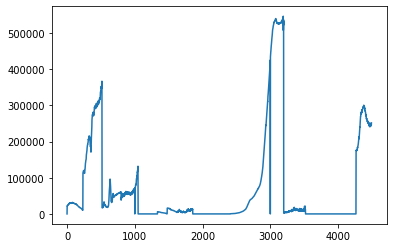

In [80]:
df['waarde'].plot()

Het package voor het plotten laden en de standaard figuurgroote aanpassen

In [81]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 5]

Scatterplot maken

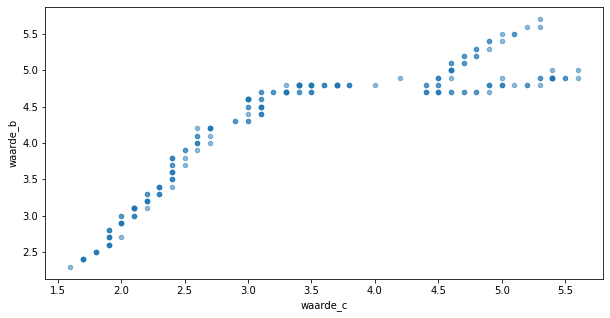

In [82]:
df_a = df[df['Instrument']=='Woninghypotheken'].dropna()
df_a = df_a[df_a['InstrumentSub'].str.contains('Rente op uit')].set_index('Periode')

df_b = df[df['Instrument']=='Zakelijke kredietverlening'].dropna()
df_b = df_b[df_b['InstrumentSub'].str.contains('Rente op uit')].set_index('Periode')

df_c = pd.merge(df_b,df_a, how='inner', left_on=['Periode'], right_on=['Periode'], suffixes=('_c','_b'))
df_c.plot.scatter(x='waarde_c',y='waarde_b', alpha=0.5)

Bar plot maken

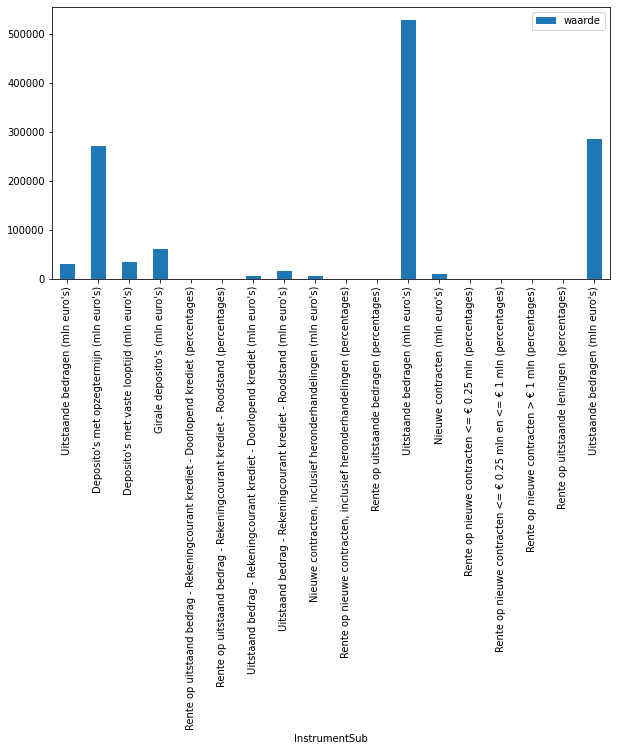

In [83]:
df[df['Periode']=='2010-06'].plot.bar(y='waarde',x='InstrumentSub')

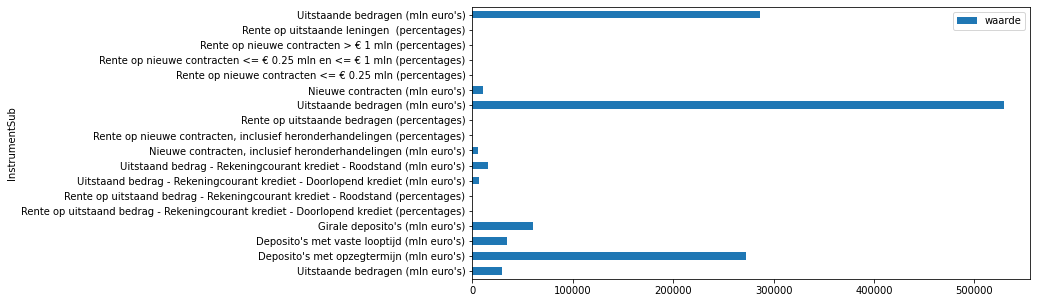

In [84]:
df[df['Periode']=='2010-06'].plot(y='waarde',x='InstrumentSub', kind='barh')

Histogram maken

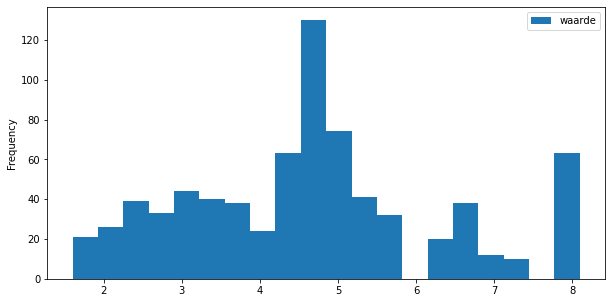

In [85]:
df[df['InstrumentSub'].str.contains('Rente op uit')].drop(columns=['Periode']).plot.hist(bins=20, density=False)

### Data wegschrijven 

Data die je in Python heb gebruikt wegschrijven om later weer te gebruiken of in andere programma's te gebruiken

Data wegschrijven om later te gebruiken

In [86]:
df.to_pickle('results.pkl')

Data wegschrijven als een csv

In [87]:
df.to_csv('results.csv', index=False, decimal=',', sep='\t')

Data wegschrijven naar Excel

In [88]:
with pd.ExcelWriter('results.xlsx') as writer:  
    df[df['Instrument']=='Woninghypotheken'].to_excel(writer, sheet_name='Woninghypotheken')
    df[df['Instrument']=='Zakelijke kredietverlening'].to_excel(writer, sheet_name='Zakelijke kredietverlening')